In [17]:
#Loading
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
sns.set_theme()
pd.set_option('display.max_columns', None)

In [5]:
# specifying the file paths for all files
mobilize_file_path = '../data/Mobilisation_data.csv'
mobilize_info_file_path =  '../data/info_mobilize.csv'

incident_file_path = '../data/Incident_data.csv'
incident_info_file_path =  '../data/info_incident.csv'

mobilize = pd.read_csv(mobilize_file_path, low_memory=False)  # reading mobilization dataframe
incident = pd.read_csv(incident_file_path, low_memory=False)  # reading incident dataframe

incident_info = pd.read_csv(incident_info_file_path, sep=";", index_col=0)  # incident info dataframe
mobilize_info = pd.read_csv(mobilize_info_file_path, sep=";", index_col=0)  # mobilization info dataframe

##  Quick general discovery and analysis of datasets

In [9]:
def analyze_dataset(df_name, df):

    """
    Analyzes a given dataframe and provides insights about its structure, data types, and missing values.

    Arguments:
    - dataset_name: Name of the dataset (string) for identification purposes.
    - dataset: The dataframe to be analyzed.

    Usage:
    - Call the analyze_dataset() function and provide the name of the dataset and the dataframe.
    - The function will display the dimensions, columns, sample rows, data types, and missing values information for the dataframe.

    Example:
    analyze_dataset("Your Dataset", your_dataset)
    """

    print(f"--- Analysis of {df_name} ---")

    # Dimensions and columns
    display("Dimensions:", df.shape)
    display("Columns:", df.columns)

    # First rows
    print("First rows:")
    display(df.head())

    # Data types
    print("Data types:")
    display(df.dtypes)

    #Further info
    print(f"Info about {df_name}:")
    display(df.info())

    # Describe dataframes
    print(f"Description of {df_name}:")
    display(df.describe())

    # Missing values
    print("Missing values:")
    display(df.isnull().sum())

    # Dubplicates:
    print("Number of duplicated rows:")
    print(df.duplicated().sum())

    # number of Modalities and print them if there are 10 or less different
    print("Number of modalities for each column:")
    for column in df.columns:
        print(f"The column {column} has {df[column].nunique()} different modalities.")
        if df[column].nunique() <= 10:
            print(f"Which are {df[column].unique()}.")
        if df[column].nunique() > 10:
            print(f"The most frequent modality is {df[column].mode()}")

    print(f"--- The End of the Analysis of {df_name} ---",'\n')
analyze_dataset('Mobilize dataframe', mobilize)
print('#########################################################','\n')
analyze_dataset('Incident dataframe', incident)

--- Analysis of Mobilize dataframe ---


'Dimensions:'

(2167042, 22)

'Columns:'

Index(['IncidentNumber', 'CalYear', 'HourOfCall', 'ResourceMobilisationId',
       'Resource_Code', 'PerformanceReporting', 'DateAndTimeMobilised',
       'DateAndTimeMobile', 'DateAndTimeArrived', 'TurnoutTimeSeconds',
       'TravelTimeSeconds', 'AttendanceTimeSeconds', 'DateAndTimeLeft',
       'DateAndTimeReturned', 'DeployedFromStation_Code',
       'DeployedFromStation_Name', 'DeployedFromLocation', 'PumpOrder',
       'PlusCode_Code', 'PlusCode_Description', 'DelayCodeId',
       'DelayCode_Description'],
      dtype='object')

First rows:


,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,01/01/2009 00:02:27,NaN,01/01/2009 00:07:46,NaN,NaN,319,01/01/2009 00:16:46,01/01/2009 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,2009,0,38427,H212,2,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,253.0,89.0,342,01/01/2009 00:12:17,01/01/2009 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,151.0,157.0,308,01/01/2009 00:16:33,01/01/2009 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,2009,0,38430,G232,1,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,108.0,102.0,210,01/01/2009 00:20:38,01/01/2009 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,2009,0,38432,A311,1,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,114.0,119.0,233,01/01/2009 00:11:58,01/01/2009 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


Data types:


IncidentNumber               object
CalYear                       int64
HourOfCall                    int64
ResourceMobilisationId        int64
Resource_Code                object
PerformanceReporting         object
DateAndTimeMobilised         object
DateAndTimeMobile            object
DateAndTimeArrived           object
TurnoutTimeSeconds          float64
TravelTimeSeconds           float64
AttendanceTimeSeconds         int64
DateAndTimeLeft              object
DateAndTimeReturned          object
DeployedFromStation_Code     object
DeployedFromStation_Name     object
DeployedFromLocation         object
PumpOrder                     int64
PlusCode_Code                object
PlusCode_Description         object
DelayCodeId                 float64
DelayCode_Description        object
dtype: object

Info about Mobilize dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167042 entries, 0 to 2167041
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   IncidentNumber            object 
 1   CalYear                   int64  
 2   HourOfCall                int64  
 3   ResourceMobilisationId    int64  
 4   Resource_Code             object 
 5   PerformanceReporting      object 
 6   DateAndTimeMobilised      object 
 7   DateAndTimeMobile         object 
 8   DateAndTimeArrived        object 
 9   TurnoutTimeSeconds        float64
 10  TravelTimeSeconds         float64
 11  AttendanceTimeSeconds     int64  
 12  DateAndTimeLeft           object 
 13  DateAndTimeReturned       object 
 14  DeployedFromStation_Code  object 
 15  DeployedFromStation_Name  object 
 16  DeployedFromLocation      object 
 17  PumpOrder                 int64  
 18  PlusCode_Code             object 
 19  PlusCode_Description      object

None

Description of Mobilize dataframe:


,CalYear,HourOfCall,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,PumpOrder,DelayCodeId
count,2.167042e+06,2.167042e+06,2.167042e+06,2.139982e+06,2.139889e+06,2.167042e+06,2.167042e+06,535968.000000
mean,2.015695e+03,1.348719e+01,4.596360e+06,8.008666e+01,2.728497e+02,3.511828e+02,1.445389e+00,10.457945
std,4.264531e+00,6.312931e+00,1.250172e+06,4.484009e+01,1.513450e+02,1.544106e+02,7.473679e-01,2.230554
min,2.009000e+03,0.000000e+00,3.842600e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000
25%,2.012000e+03,9.000000e+00,3.901780e+06,5.500000e+01,1.720000e+02,2.500000e+02,1.000000e+00,9.000000
50%,2.016000e+03,1.400000e+01,4.693806e+06,7.400000e+01,2.460000e+02,3.250000e+02,1.000000e+00,12.000000
75%,2.019000e+03,1.900000e+01,5.533076e+06,9.700000e+01,3.410000e+02,4.200000e+02,2.000000e+00,12.000000
max,2.023000e+03,2.300000e+01,6.344481e+06,1.185000e+03,1.198000e+03,1.200000e+03,1.300000e+01,13.000000


Missing values:


IncidentNumber                    0
CalYear                           0
HourOfCall                        0
ResourceMobilisationId            0
Resource_Code                     0
PerformanceReporting              0
DateAndTimeMobilised              0
DateAndTimeMobile             26933
DateAndTimeArrived                0
TurnoutTimeSeconds            27060
TravelTimeSeconds             27153
AttendanceTimeSeconds             0
DateAndTimeLeft               46338
DateAndTimeReturned         1193884
DeployedFromStation_Code         27
DeployedFromStation_Name         27
DeployedFromLocation           1086
PumpOrder                         0
PlusCode_Code                     0
PlusCode_Description              0
DelayCodeId                 1631074
DelayCode_Description       1631074
dtype: int64

Number of duplicated rows:
0
Number of modalities for each column:
The column IncidentNumber has 1441894 different modalities.
The most frequent modality is 0    053666-07052021
Name: IncidentNumber, dtype: object
The column CalYear has 15 different modalities.
The most frequent modality is 0    2022
Name: CalYear, dtype: int64
The column HourOfCall has 24 different modalities.
The most frequent modality is 0    19
Name: HourOfCall, dtype: int64
The column ResourceMobilisationId has 2167042 different modalities.
The most frequent modality is 0            38426
1            38427
2            38429
3            38430
4            38431
            ...   
2167037    6344474
2167038    6344476
2167039    6344477
2167040    6344480
2167041    6344481
Name: ResourceMobilisationId, Length: 2167042, dtype: int64
The column Resource_Code has 187 different modalities.
The most frequent modality is 0    A242
Name: Resource_Code, dtype: object
The column PerformanceReporting has 3 different modal

'Dimensions:'

(1570482, 39)

'Columns:'

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

First rows:


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,1.0,255.0,1.0
1,1091,01 Jan 2009,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2091,01 Jan 2009,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
3,3091,01 Jan 2009,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
4,5091,01 Jan 2009,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2.0,1.0,255.0,1.0


Data types:


IncidentNumber                             object
DateOfCall                                 object
CalYear                                     int64
TimeOfCall                                 object
HourOfCall                                  int64
IncidentGroup                              object
StopCodeDescription                        object
SpecialServiceType                         object
PropertyCategory                           object
PropertyType                               object
AddressQualifier                           object
Postcode_full                              object
Postcode_district                          object
UPRN                                      float64
USRN                                      float64
IncGeo_BoroughCode                         object
IncGeo_BoroughName                         object
ProperCase                                 object
IncGeo_WardCode                            object
IncGeo_WardName                            object


Info about Incident dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570482 entries, 0 to 1570481
Data columns (total 39 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1570482 non-null  object 
 1   DateOfCall                              1570482 non-null  object 
 2   CalYear                                 1570482 non-null  int64  
 3   TimeOfCall                              1570482 non-null  object 
 4   HourOfCall                              1570482 non-null  int64  
 5   IncidentGroup                           1570482 non-null  object 
 6   StopCodeDescription                     1570482 non-null  object 
 7   SpecialServiceType                      498546 non-null   object 
 8   PropertyCategory                        1570482 non-null  object 
 9   PropertyType                            1570482 non-null  object 
 10 

None

Description of Incident dataframe:


,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,1.570482e+06,1.570482e+06,1.429149e+06,1.407611e+06,804123.000000,804123.000000,1.570482e+06,1.570482e+06,804123.000000,804123.000000,1.444882e+06,561862.000000,1.558503e+06,1.558503e+06,1.561289e+06,1.561008e+06,1.551859e+06,1.568638e+06
mean,2.015548e+03,1.348646e+01,2.256343e+10,2.029569e+07,530641.426628,180364.144424,5.306723e+05,1.805046e+05,51.463152,-0.118795,3.177942e+02,394.143046,1.364361e+00,1.555810e+00,1.596280e+00,1.354489e+00,4.151659e+02,1.334922e+00
std,4.292498e+00,6.238295e+00,4.814329e+10,4.382267e+06,10329.371945,7442.342732,9.726993e+03,7.351619e+03,1.504158,0.148936,1.391575e+02,153.742621,6.679315e-01,8.305214e-01,1.608702e+00,9.948203e+00,2.811771e+03,1.504809e+00
min,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,503582.000000,155901.000000,5.035500e+05,1.559500e+05,0.000000,-0.510155,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.550000e+02,1.000000e+00
25%,2.012000e+03,9.000000e+00,0.000000e+00,2.040094e+07,525212.000000,175983.000000,5.252500e+05,1.761500e+05,51.468885,-0.197216,2.300000e+02,293.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.600000e+02,1.000000e+00
50%,2.016000e+03,1.400000e+01,0.000000e+00,2.120124e+07,530799.000000,180984.000000,5.309500e+05,1.810500e+05,51.512895,-0.117010,2.950000e+02,367.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.260000e+02,1.000000e+00
75%,2.019000e+03,1.900000e+01,1.001544e+10,2.210129e+07,536842.000000,184944.000000,5.363500e+05,1.851500e+05,51.547777,-0.028734,3.770000e+02,462.000000,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,3.520000e+02,1.000000e+00
max,2.023000e+03,2.300000e+01,2.000044e+11,9.999042e+07,560925.000000,200906.000000,6.111500e+05,3.024500e+05,51.691670,0.319743,1.200000e+03,1200.000000,4.600000e+01,1.060000e+02,9.510000e+02,8.761000e+03,2.277860e+06,3.690000e+02


Missing values:


IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1071936
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              766359
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                                 3
IncGeo_WardName                                 3


Number of duplicated rows:
0
Number of modalities for each column:
The column IncidentNumber has 1570482 different modalities.
The most frequent modality is 0          000001-01012016
1          000001-01012020
2          000001-01012022
3          000001-01012023
4          000002-01012016
                ...       
1570477           99999101
1570478           99999121
1570479           99999131
1570480           99999141
1570481           99999151
Name: IncidentNumber, Length: 1570482, dtype: object
The column DateOfCall has 5233 different modalities.
The most frequent modality is 0    12 Jul 2021
Name: DateOfCall, dtype: object
The column CalYear has 15 different modalities.
The most frequent modality is 0    2009
Name: CalYear, dtype: int64
The column TimeOfCall has 86391 different modalities.
The most frequent modality is 0    19:11:16
Name: TimeOfCall, dtype: object
The column HourOfCall has 24 different modalities.
The most frequent modality is 0    18
Name: HourOfCall, dtype: i

In [5]:
# Summarize mobilize
mobilize_info["percent_missing_values"] = mobilize.isna().mean().values*100 # add percent of missing values
mobilize_info["total_missing_values"] = mobilize.isna().sum().values # add total missing values
mobilize_info["data_type"] = mobilize.dtypes.values # add data types
mobilize_info["num_categories"] = mobilize.apply(lambda x: x.nunique()).values # add number of different categories
display(mobilize_info)

,Name of the Column,Description,variable_type,percent_missing_values,total_missing_values,data_type,num_categories
Column,,,,,,,
1,IncidentNumber,LFB Incident Number,categorical,0.000000,0,object,1441894
2,CalYear,Year of 999 call,quantitative,0.000000,0,int64,15
3,HourOfCall,Hour of 999 call,quantitative,0.000000,0,int64,24
4,ResourceMobilisationId,LFB Resource Mobilisation ID,categorical,0.000000,0,int64,2167042
5,Resource_Code,LFB Resource Code,categorical,0.000000,0,object,187
6,PerformanceReporting,First Pump arrived at incident,categorical,0.000000,0,object,3
7,DateAndTimeMobilised,Date and time of mobilised (GMT),Date/Time,0.000000,0,object,1462145
8,DateAndTimeMobile,Date and time of mobile (GMT),Date/Time,1.242846,26933,object,2123110
9,DateAndTimeArrived,Date and time arrived (GMT),Date/Time,0.000000,0,object,2153254


In [6]:
# Summarize Incident
incident_info["percent_missing_values"] = incident.isna().mean().values*100 # add percent of missing values
incident_info["total_missing_values"] = incident.isna().sum().values # add total missing values
incident_info["data_type"] = incident.dtypes.values # add data types
incident_info["num_categories"] = incident.apply(lambda x: x.nunique()).values # add number of different categories

display(incident_info)

,Name of the Column,Description,variable_tpe,percent_missing_values,total_missing_values,data_type,num_categories
Column,,,,,,,
1,IncidentNumber,LFB Incident Number,categorical,0.000000,0,object,1570482
2,DateOfCall,Date of 999 call,Date/Time,0.000000,0,object,5233
3,CalYear,Year of 999 call,quantitative,0.000000,0,int64,15
4,TimeOfCall,Time of 999 call,Date/Time,0.000000,0,object,86391
5,HourOfCall,Hour of 999 call,quantitative,0.000000,0,int64,24
6,IncidentGroup,High level incident category,categorical,0.000000,0,object,3
7,StopCodeDescription,Detailed incident category,categorical,0.000000,0,object,10
8,SpecialServiceType,Further detail for special services incident c...,categorical,68.255224,1071936,object,21
9,PropertyCategory,High level property descriptor,categorical,0.000000,0,object,9


In [7]:
incident_info.to_csv('../data/incident_info_streamlit.csv', index=False) # save the incident info dataframe as csv
mobilize_info.to_csv('../data/mobilize_info_streamlit.csv', index=False) # save the mobilize info dataframe as csv

### merge dataframes 

In [22]:
# join the two dataframes and print analysis
merged_df = mobilize.merge(right=incident, on=["IncidentNumber", "HourOfCall", "CalYear"], how="inner")
analyze_dataset('Merged dataframe', merged_df)

merged_df.to_csv('../data/merged_df.csv', index=False) # save the merged dataframe as csv

--- Analysis of Merged dataframe ---


'Dimensions:'

(2160394, 58)

'Columns:'

Index(['IncidentNumber', 'CalYear', 'HourOfCall', 'ResourceMobilisationId',
       'Resource_Code', 'PerformanceReporting', 'DateAndTimeMobilised',
       'DateAndTimeMobile', 'DateAndTimeArrived', 'TurnoutTimeSeconds',
       'TravelTimeSeconds', 'AttendanceTimeSeconds', 'DateAndTimeLeft',
       'DateAndTimeReturned', 'DeployedFromStation_Code',
       'DeployedFromStation_Name', 'DeployedFromLocation', 'PumpOrder',
       'PlusCode_Code', 'PlusCode_Description', 'DelayCodeId',
       'DelayCode_Description', 'DateOfCall', 'TimeOfCall', 'IncidentGroup',
       'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory',
       'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGr

First rows:


,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,235138081,2009,0,38426,H271,1,01/01/2009 00:02:27,NaN,01/01/2009 00:07:46,NaN,NaN,319,01/01/2009 00:16:46,01/01/2009 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:00:37,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,1.0,255.0,1.0
1,235138081,2009,0,38427,H212,2,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,253.0,89.0,342,01/01/2009 00:12:17,01/01/2009 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:00:37,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,1.0,255.0,1.0
2,2091,2009,0,38429,A341,1,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,151.0,157.0,308,01/01/2009 00:16:33,01/01/2009 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:03:00,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
3,3091,2009,0,38430,G232,1,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,108.0,102.0,210,01/01/2009 00:20:38,01/01/2009 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:04:27,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
4,5091,2009,0,38432,A311,1,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,114.0,119.0,233,01/01/2009 00:11:58,01/01/2009 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:05:39,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2.0,1.0,255.0,1.0


Data types:


IncidentNumber                             object
CalYear                                     int64
HourOfCall                                  int64
ResourceMobilisationId                      int64
Resource_Code                              object
PerformanceReporting                       object
DateAndTimeMobilised                       object
DateAndTimeMobile                          object
DateAndTimeArrived                         object
TurnoutTimeSeconds                        float64
TravelTimeSeconds                         float64
AttendanceTimeSeconds                       int64
DateAndTimeLeft                            object
DateAndTimeReturned                        object
DeployedFromStation_Code                   object
DeployedFromStation_Name                   object
DeployedFromLocation                       object
PumpOrder                                   int64
PlusCode_Code                              object
PlusCode_Description                       object


Info about Merged dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160394 entries, 0 to 2160393
Data columns (total 58 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   IncidentNumber                          object 
 1   CalYear                                 int64  
 2   HourOfCall                              int64  
 3   ResourceMobilisationId                  int64  
 4   Resource_Code                           object 
 5   PerformanceReporting                    object 
 6   DateAndTimeMobilised                    object 
 7   DateAndTimeMobile                       object 
 8   DateAndTimeArrived                      object 
 9   TurnoutTimeSeconds                      float64
 10  TravelTimeSeconds                       float64
 11  AttendanceTimeSeconds                   int64  
 12  DateAndTimeLeft                         object 
 13  DateAndTimeReturned                     object 
 14  Deplo

None

Description of Merged dataframe:


,CalYear,HourOfCall,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,PumpOrder,DelayCodeId,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,2.160394e+06,2.160394e+06,2.160394e+06,2.133407e+06,2.133313e+06,2.160394e+06,2.160394e+06,530528.000000,1.999504e+06,1.970717e+06,1.015615e+06,1.015615e+06,2.160394e+06,2.160394e+06,1.015615e+06,1.015615e+06,2.160388e+06,1.282756e+06,2.160394e+06,2.160394e+06,2.160394e+06,2.160112e+06,2.160093e+06,2.159033e+06
mean,2.015692e+03,1.348619e+01,4.595616e+06,8.006782e+01,2.720958e+02,3.504176e+02,1.446306e+00,10.454815,2.103575e+10,2.032070e+07,5.305769e+05,1.803766e+05,5.305744e+05,1.805001e+05,5.146202e+01,-1.197145e-01,3.104948e+02,3.898810e+02,1.654314e+00,1.971849e+00,2.033761e+00,1.540990e+00,4.769393e+02,1.362370e+00
std,4.264404e+00,6.314110e+00,1.250232e+06,4.477613e+01,1.504535e+02,1.535013e+02,7.480091e-01,2.229315,4.696044e+10,4.358884e+06,1.027793e+04,7.366441e+03,9.645703e+03,7.290748e+03,1.525511e+00,1.481893e-01,1.302768e+02,1.501002e+02,9.046361e-01,1.072510e+00,1.838679e+00,7.091484e+00,2.228325e+03,1.773464e+00
min,2.009000e+03,0.000000e+00,3.842600e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000,0.000000e+00,0.000000e+00,5.035820e+05,1.559010e+05,5.035500e+05,1.559500e+05,0.000000e+00,-5.101547e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.550000e+02,1.000000e+00
25%,2.012000e+03,9.000000e+00,3.901172e+06,5.500000e+01,1.710000e+02,2.500000e+02,1.000000e+00,9.000000,0.000000e+00,2.040096e+07,5.252210e+05,1.760010e+05,5.252500e+05,1.761500e+05,5.146899e+01,-1.970089e-01,2.280000e+02,2.920000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.600000e+02,1.000000e+00
50%,2.016000e+03,1.400000e+01,4.692750e+06,7.400000e+01,2.450000e+02,3.240000e+02,1.000000e+00,12.000000,0.000000e+00,2.120131e+07,5.308130e+05,1.809920e+05,5.308500e+05,1.810500e+05,5.151297e+01,-1.167280e-01,2.900000e+02,3.640000e+02,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,3.280000e+02,1.000000e+00
75%,2.019000e+03,1.900000e+01,5.532247e+06,9.600000e+01,3.400000e+02,4.200000e+02,2.000000e+00,12.000000,1.000899e+10,2.210210e+07,5.366820e+05,1.849750e+05,5.361500e+05,1.851500e+05,5.154816e+01,-3.115368e-02,3.670000e+02,4.560000e+02,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,3.640000e+02,1.000000e+00
max,2.023000e+03,2.300000e+01,6.344481e+06,1.185000e+03,1.198000e+03,1.200000e+03,1.300000e+01,13.000000,2.000044e+11,9.999042e+07,5.609250e+05,2.009060e+05,5.609500e+05,2.009500e+05,5.169167e+01,3.197432e-01,1.200000e+03,1.200000e+03,4.600000e+01,1.060000e+02,4.020000e+02,2.163000e+03,7.094640e+05,3.690000e+02


Missing values:


IncidentNumber                                  0
CalYear                                         0
HourOfCall                                      0
ResourceMobilisationId                          0
Resource_Code                                   0
PerformanceReporting                            0
DateAndTimeMobilised                            0
DateAndTimeMobile                           26861
DateAndTimeArrived                              0
TurnoutTimeSeconds                          26987
TravelTimeSeconds                           27081
AttendanceTimeSeconds                           0
DateAndTimeLeft                             46259
DateAndTimeReturned                       1189473
DeployedFromStation_Code                       23
DeployedFromStation_Name                       23
DeployedFromLocation                         1079
PumpOrder                                       0
PlusCode_Code                                   0
PlusCode_Description                            0


Number of duplicated rows:
0
Number of modalities for each column:
The column IncidentNumber has 1436133 different modalities.
The most frequent modality is 0    053666-07052021
Name: IncidentNumber, dtype: object
The column CalYear has 15 different modalities.
The most frequent modality is 0    2022
Name: CalYear, dtype: int64
The column HourOfCall has 24 different modalities.
The most frequent modality is 0    19
Name: HourOfCall, dtype: int64
The column ResourceMobilisationId has 2160394 different modalities.
The most frequent modality is 0            38426
1            38427
2            38429
3            38430
4            38431
            ...   
2160389    6344474
2160390    6344476
2160391    6344477
2160392    6344480
2160393    6344481
Name: ResourceMobilisationId, Length: 2160394, dtype: int64
The column Resource_Code has 187 different modalities.
The most frequent modality is 0    A242
Name: Resource_Code, dtype: object
The column PerformanceReporting has 3 different modal

The column PumpCount has 119 different modalities.
The most frequent modality is 0    2.0
Name: PumpCount, dtype: float64
The column PumpHoursRoundUp has 281 different modalities.
The most frequent modality is 0    1.0
Name: PumpHoursRoundUp, dtype: float64
The column Notional Cost (£) has 1112 different modalities.
The most frequent modality is 0    260.0
Name: Notional Cost (£), dtype: float64
The column NumCalls has 92 different modalities.
The most frequent modality is 0    1.0
Name: NumCalls, dtype: float64
--- The End of the Analysis of Merged dataframe --- 



In [10]:
columnes = ['Name of the Column', 'percent_missing_values', 'total_missing_values', 'data_type', 'num_categories']
merged_df_info = pd.DataFrame(columns=columnes)

for column in merged_df.columns:
    row = {
        'Name of the Column': column,
        'percent_missing_values': merged_df[column].isna().mean() * 100,# Calculate the percentage of missing values in the column
        'total_missing_values': merged_df[column].isna().sum(),# Calculate the total number of missing values in the column
        'data_type': merged_df[column].dtype,# Get the data type of the column
        'num_categories': merged_df[column].nunique()# Get the number of unique categories in the column
    }
    merged_df_info = pd.concat([merged_df_info, pd.DataFrame(row, index=[0])], ignore_index=True)

display(merged_df_info.head(60))

,Name of the Column,percent_missing_values,total_missing_values,data_type,num_categories
0,IncidentNumber,0.000000,0,object,1436133
1,CalYear,0.000000,0,int64,15
2,HourOfCall,0.000000,0,int64,24
3,ResourceMobilisationId,0.000000,0,int64,2160394
4,Resource_Code,0.000000,0,object,187
5,PerformanceReporting,0.000000,0,object,3
6,DateAndTimeMobilised,0.000000,0,object,1455999
7,DateAndTimeMobile,1.243338,26861,object,2116592
8,DateAndTimeArrived,0.000000,0,object,2146652
9,TurnoutTimeSeconds,1.249170,26987,float64,883


In [12]:
# Further discovery and analysis of datasets

# development of the mean working time over the years
display(merged_df.pivot_table(["TurnoutTimeSeconds", "TravelTimeSeconds", "AttendanceTimeSeconds"], ["CalYear"], aggfunc=["mean", "max"]))
# there is only a little variation of values over the time, only the TurnoutTime in the Year 2009 was a little bit
# higher than in the following years (check if this difference is significant)


# the number of incidents per year and the proportion of Delays (how show the proportion and not the total number??)
display(merged_df.pivot_table(["IncidentNumber", "DelayCodeId"], ["CalYear"], aggfunc="count"))
#short analysis of result

# is there a correlation between the time and the performance rating or the delay
display(merged_df.pivot_table(["TurnoutTimeSeconds", "TravelTimeSeconds", "AttendanceTimeSeconds"], ["PerformanceReporting"], aggfunc=["mean", "max"]))
# Response and Tournout time are lower the Incidant has a better Performance Rating (signifiacant?)
# why is the max Time 1200, what causes a Response/Turnout time > 1000 seconds?, how often does a Response/Turnout
# time appear?

display(merged_df.pivot_table(["TurnoutTimeSeconds", "TravelTimeSeconds", "AttendanceTimeSeconds"], ["DelayCode_Description"], aggfunc=["mean", "max"]))
#the response time compare with mean no_delay (do DelayCode_Description or Id = nan)
# turnout time higher when there is something wrong with the Equitment, Radio or anything during the mobilisation
# Travel time is higher if there is something wrong with the adress, or given location, weather conditions, traffic

# is there a difference between the different stations
display(merged_df.pivot_table(["TurnoutTimeSeconds", "TravelTimeSeconds", "AttendanceTimeSeconds"], ["FirstPumpArriving_DeployedFromStation"], aggfunc=["mean"]))
#short analysis of result



# Short description of what and why we are doing this
display(merged_df.pivot_table(["TurnoutTimeSeconds", "TravelTimeSeconds", "AttendanceTimeSeconds"], ["IncidentGroup"], aggfunc=["mean"]))
#short analysis of result

mean                                       \
        AttendanceTimeSeconds TravelTimeSeconds TurnoutTimeSeconds   
CalYear                                                              
2009               349.375407        234.201248         119.001011   
2010               354.581407        264.626529          91.981881   
2011               346.233817        266.238038          81.786236   
2012               344.320735        268.805865          77.419317   
2013               343.439887        269.985514          75.280920   
2014               356.443105        283.255024          74.808175   
2015               363.005638        288.657065          76.301768   
2016               355.932623        280.750422          76.666263   
2017               348.857237        276.784285          73.637364   
2018               350.267101        277.622719          74.605963   
2019               350.696347        276.600306          75.797617   
2020               338.643096        265.555507          74.043311   
2021               348.407849        275.479598          73.814619   
2022               355.989888        285.288208          71.723831   
2023               351.677863        277.841890          74.947590   

                          max                                       
        AttendanceTimeSeconds TravelTimeSeconds TurnoutTimeSeconds  
CalYear                                                             
2009                     1200            1178.0             1150.0  
2010                     1200            1185.0             1122.0  
2011                     1200            1193.0             1146.0  
2012                     1200            1198.0             1070.0  
2013                     1200            1190.0             1125.0  
2014                     1199            1169.0             1022.0  
2015                     1200            1191.0             1146.0  
2016                     1200            1169.0             1185.0  
2017                     1200            1195.0             1051.0  
2018                     1200            1158.0             1143.0  
2019                     1200            1181.0             1084.0  
2020                     1200            1182.0             1109.0  
2021                     1200            1180.0             1160.0  
2022                     1200            1173.0             1041.0  
2023                     1197            1137.0             1016.0

,DelayCodeId,IncidentNumber
CalYear,,
2009,45266,174749
2010,42901,163531
2011,36431,152773
2012,34088,145095
2013,32574,136717
2014,35262,126873
2015,38351,131791
2016,38551,144145
2017,35155,147615


mean                    \
                     AttendanceTimeSeconds TravelTimeSeconds   
PerformanceReporting                                           
1                               317.853006        242.433324   
2                               394.204680        310.332561   
Not Used                        485.018007        398.530856   

                                                          max  \
                     TurnoutTimeSeconds AttendanceTimeSeconds   
PerformanceReporting                                            
1                             77.647972                  1200   
2                             84.276875                  1200   
Not Used                      86.721025                  1200   

                                                           
                     TravelTimeSeconds TurnoutTimeSeconds  
PerformanceReporting                                       
1                               1198.0             1160.0  
2                               1195.0             1152.0  
Not Used                        1176.0             1185.0

mean                    \
                                   AttendanceTimeSeconds TravelTimeSeconds   
DelayCode_Description                                                        
Address incomplete/wrong                      591.530907        506.325962   
Appliance/Equipment defect                    541.653706        428.406389   
Arrived but held up - Other reason            552.306211        460.009001   
At drills when mobilised                      496.919466        389.821250   
Mob/Radio problems when mobilised             526.901701        395.271742   
Not held up                                   502.681330        413.240392   
On outside duty when mobilised                522.376213        452.343915   
Traffic calming measures                      496.449953        409.520846   
Traffic, roadworks, etc                       509.283525        428.514970   
Weather conditions                            526.301329        431.068277   

                                                                        max  \
                                   TurnoutTimeSeconds AttendanceTimeSeconds   
DelayCode_Description                                                         
Address incomplete/wrong                    85.278219                  1200   
Appliance/Equipment defect                 112.188777                  1200   
Arrived but held up - Other reason          92.155256                  1200   
At drills when mobilised                   106.815497                  1192   
Mob/Radio problems when mobilised          130.465348                  1198   
Not held up                                 89.175607                  1200   
On outside duty when mobilised              70.090791                  1194   
Traffic calming measures                    86.827060                  1200   
Traffic, roadworks, etc                     80.676563                  1200   
Weather conditions                          95.146781                  1200   

                                                                         
                                   TravelTimeSeconds TurnoutTimeSeconds  
DelayCode_Description                                                    
Address incomplete/wrong                      1192.0             1012.0  
Appliance/Equipment defect                    1178.0              939.0  
Arrived but held up - Other reason            1184.0              914.0  
At drills when mobilised                      1099.0              816.0  
Mob/Radio problems when mobilised             1175.0             1152.0  
Not held up                                   1198.0             1160.0  
On outside duty when mobilised                1169.0              866.0  
Traffic calming measures                      1193.0             1143.0  
Traffic, roadworks, etc                       1187.0             1146.0  
Weather conditions                            1185.0              955.0

mean                    \
                                      AttendanceTimeSeconds TravelTimeSeconds   
FirstPumpArriving_DeployedFromStation                                           
Acton                                            350.673429        276.764141   
Addington                                        360.153679        283.095263   
Barking                                          371.595190        293.840876   
Barnet                                           379.665640        306.662204   
Battersea                                        319.007272        243.691818   
...                                                     ...               ...   
Willesden                                        356.354697        280.485422   
Wimbledon                                        362.213742        284.740787   
Woodford                                         391.514646        318.669522   
Woodside                                         381.011292        300.720349   
Woolwich                                         333.215739        256.961443   

                                                          
                                      TurnoutTimeSeconds  
FirstPumpArriving_DeployedFromStation                     
Acton                                          75.502858  
Addington                                      79.398586  
Barking                                        79.824406  
Barnet                                         74.901719  
Battersea                                      77.169179  
...                                                  ...  
Willesden                                      77.369637  
Wimbledon                                      79.477556  
Woodford                                       75.164236  
Woodside                                       82.783843  
Woolwich                                       78.240644  

[115 rows x 3 columns]

mean                                     
                AttendanceTimeSeconds TravelTimeSeconds TurnoutTimeSeconds
IncidentGroup                                                             
False Alarm                348.112351        269.171490          79.512013
Fire                       363.953578        284.305588          81.038913
Special Service            343.703057        268.300949          80.655950

### correlation analysis 

C:\Users\User1\AppData\Local\Temp\ipykernel_15532\133752951.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


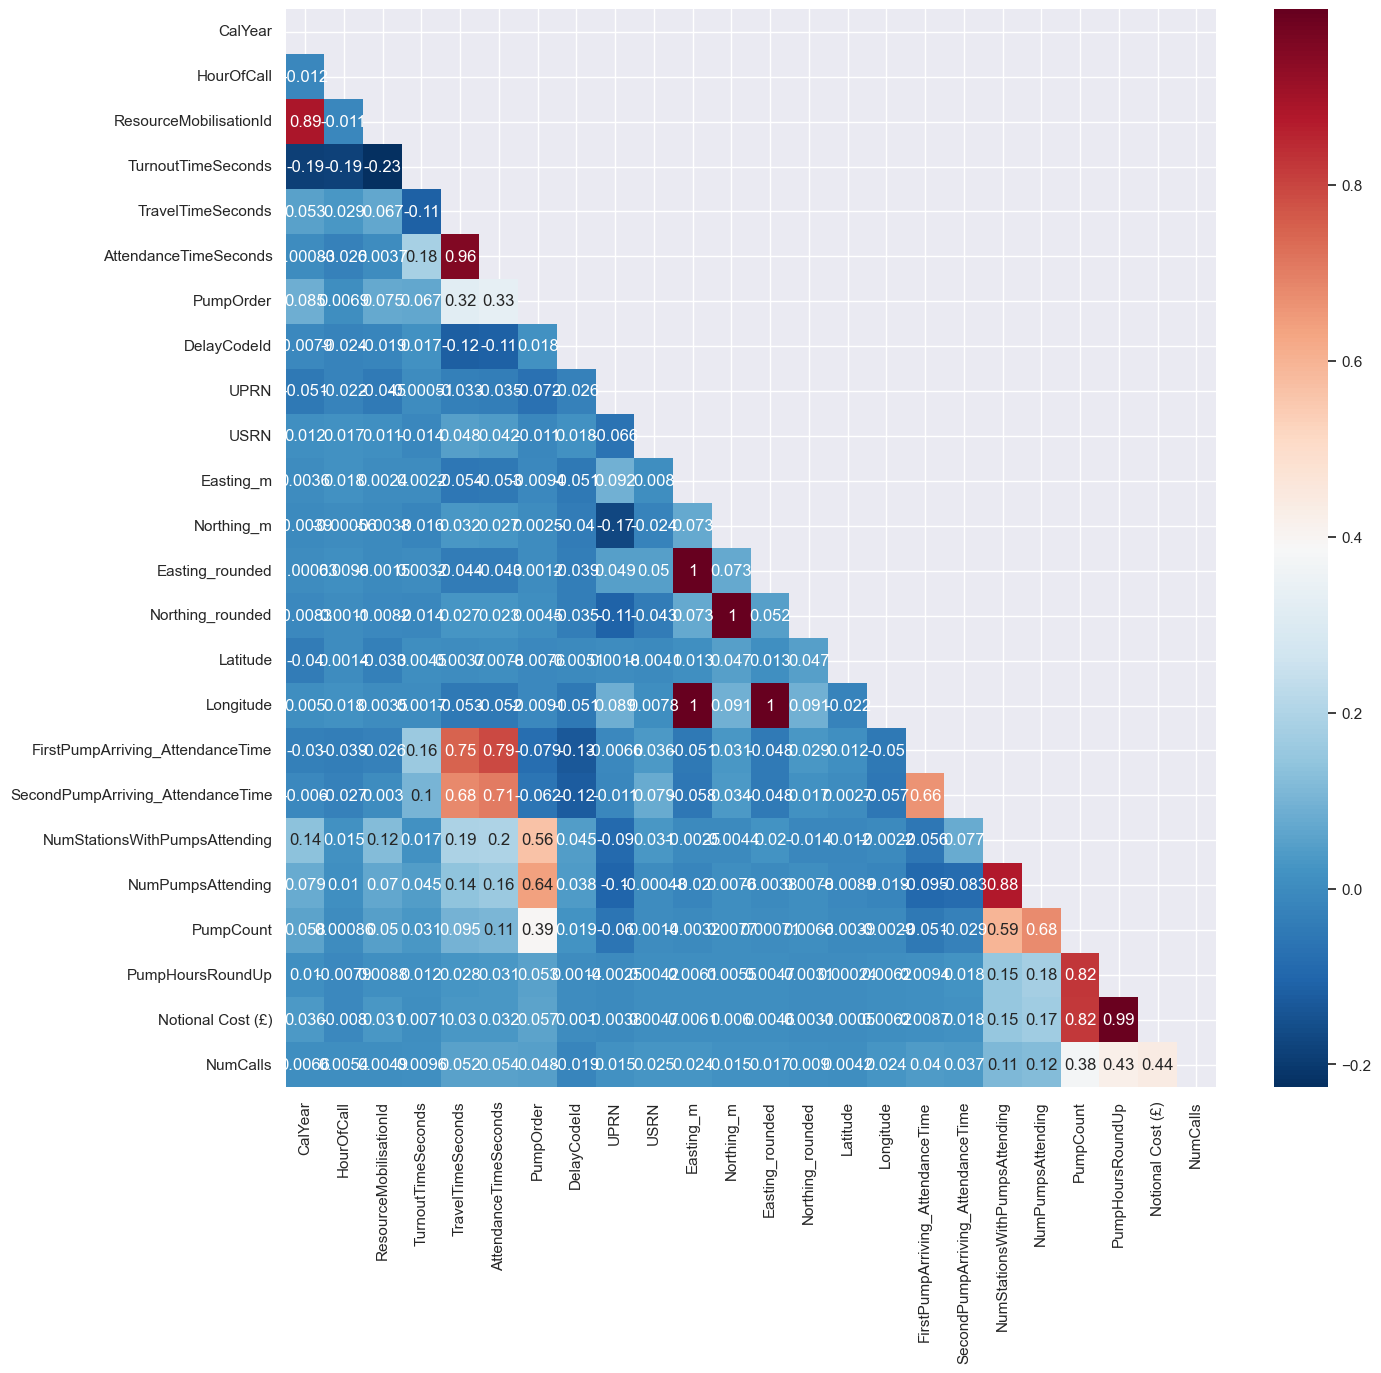

In [11]:
# creating correlation matrix with nubers runded by 3

correlation_matrix = merged_df.corr()   
matrix = np.triu(correlation_matrix)
rounded_corr_matrix = correlation_matrix.round(3) 

# creating a figure and displaying the matrix as a heatmap
plt.figure(figsize=(15,14))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', mask=matrix)
plt.show()

In [12]:
# ANOVA between target and categorical variables
from scipy.stats import f_oneway, pearsonr

categorical_columns =merged_df.select_dtypes(include=['object']).columns # select all categorical columns
target = merged_df['AttendanceTimeSeconds'] # the Attendance time is the target

# anova between categorical columns and target
print("\nANOVA:\n") 
max_unique_values = 500

# create empty lists fot the results
anova_fval = []
anova_pval = []
anova_col = []

# go through all categirical columns and check if there are less than 500 unique values
for col in categorical_columns:
    if merged_df[col].nunique() <= max_unique_values:
        df_nonan = merged_df[[col, 'AttendanceTimeSeconds']].dropna()
        labels = df_nonan[col].unique()

        # Perform ANOVA only if there are at least two unique labels
        if len(labels) >= 2:
            lst = [df_nonan['AttendanceTimeSeconds'][df_nonan[col] == label] for label in labels]
            f_val, p_val = f_oneway(*lst)
            
            # store the results in the created lists
            anova_col.append(col)
            anova_fval.append(f_val)
            anova_pval.append(p_val) 

            # Unhide to see every test
            # print(f"ANOVA result for {col}: F = {f_val}, P = {p_val}")

# create a dataframe containing the column name and the anova results
anova_results = pd.DataFrame({'column': anova_col,
                              'f_value': anova_fval,
                              'p_value': anova_pval})

display(anova_results)

# pearson test between target and numeric columns
print("\nPEARSON:\n")

# create empty list for test results
pearson_pval = []
pearson_corr = []

# select all numeric columns and remove the target
numeric_columns = merged_df.select_dtypes(include=[np.number]).drop('AttendanceTimeSeconds', axis=1).columns 

# go through all nmerical columns and perform pearson test
for col in numeric_columns:
    df_nonan = merged_df[[col, 'AttendanceTimeSeconds']].dropna()
    correlation, p_val = pearsonr(df_nonan[col], df_nonan['AttendanceTimeSeconds'])
    
    # store all results in the created lists
    pearson_corr.append(correlation)
    pearson_pval.append(p_val) 

    # Unhide to see every test also below
    # print(f'Correlation between {col} and AttendanceTimeSeconds: {correlation}')

# create a dataframe containing the column name and the pearson test results
pearson_results = pd.DataFrame({'column': numeric_columns,
                                'correlation': pearson_corr,
                                'p_value': pearson_pval})

display(pearson_results)


ANOVA:



,column,f_value,p_value
0,Resource_Code,530.997064,0.0
1,PerformanceReporting,133439.836393,0.0
2,DeployedFromStation_Code,858.398396,0.0
3,DeployedFromStation_Name,858.398396,0.0
4,DeployedFromLocation,6520.235968,0.0
5,PlusCode_Code,1713.653264,0.0
6,PlusCode_Description,1713.653264,0.0
7,DelayCode_Description,1517.121939,0.0
8,IncidentGroup,2313.012491,0.0
9,StopCodeDescription,2152.697025,0.0



PEARSON:



,column,correlation,p_value
0,CalYear,0.000830,2.222929e-01
1,HourOfCall,-0.026458,0.000000e+00
2,ResourceMobilisationId,0.003709,4.992017e-08
3,TurnoutTimeSeconds,0.182694,0.000000e+00
4,TravelTimeSeconds,0.956309,0.000000e+00
5,PumpOrder,0.333520,0.000000e+00
6,DelayCodeId,-0.114077,0.000000e+00
7,UPRN,-0.035071,0.000000e+00
8,USRN,0.041752,0.000000e+00
9,Easting_m,-0.052827,0.000000e+00


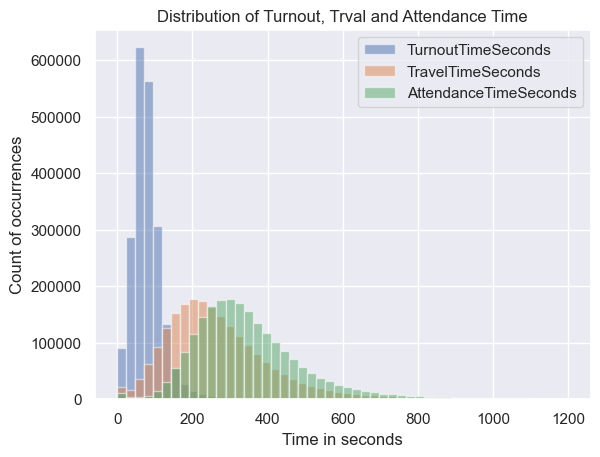

In [13]:
# analyzing the distribution of the Attendance Time and the correlated columns
# creating histograms for the Turnout, Travel and attendance Time
plt.hist(merged_df['TurnoutTimeSeconds'], bins=50, alpha=0.5, label='TurnoutTimeSeconds')
plt.hist(merged_df['TravelTimeSeconds'], bins=50, alpha=0.5, label='TravelTimeSeconds')
plt.hist(merged_df['AttendanceTimeSeconds'], bins=50, alpha=0.5, label='AttendanceTimeSeconds')
plt.title('Distribution of Turnout, Trval and Attendance Time') # set title
plt.xlabel('Time in seconds') # name xaxis
plt.ylabel('Count of occurrences') # name yaxis
plt.legend(loc='upper right') # show the legend in the upper right corner
plt.show();

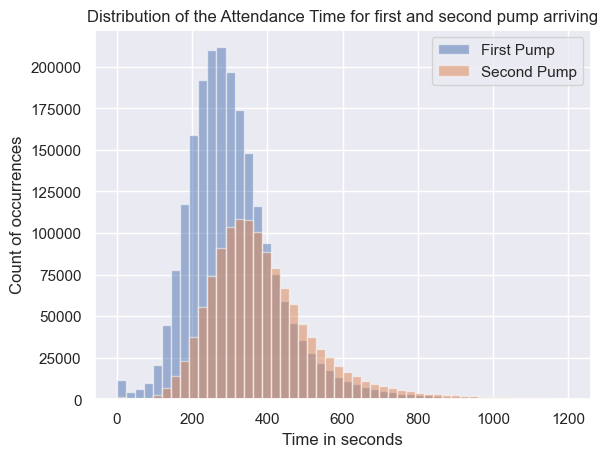

In [15]:
# creating histograms for the First pump and second pump arriving attendance Time
plt.hist(merged_df['FirstPumpArriving_AttendanceTime'], bins=50, alpha=0.5, label='First Pump')
plt.hist(merged_df['SecondPumpArriving_AttendanceTime'], bins=50, alpha=0.5, label='Second Pump')
plt.title('Distribution of the Attendance Time for first and second pump arriving') # set title
plt.xlabel('Time in seconds') # name xaxis
plt.ylabel('Count of occurrences') # name yaxis
plt.legend(loc='upper right') # show the legend in the upper right corner
plt.show();

There is a significant deviation from the mean Attendance time in 2020 to the values before this year. The p-value is 5.181444820551408e-224


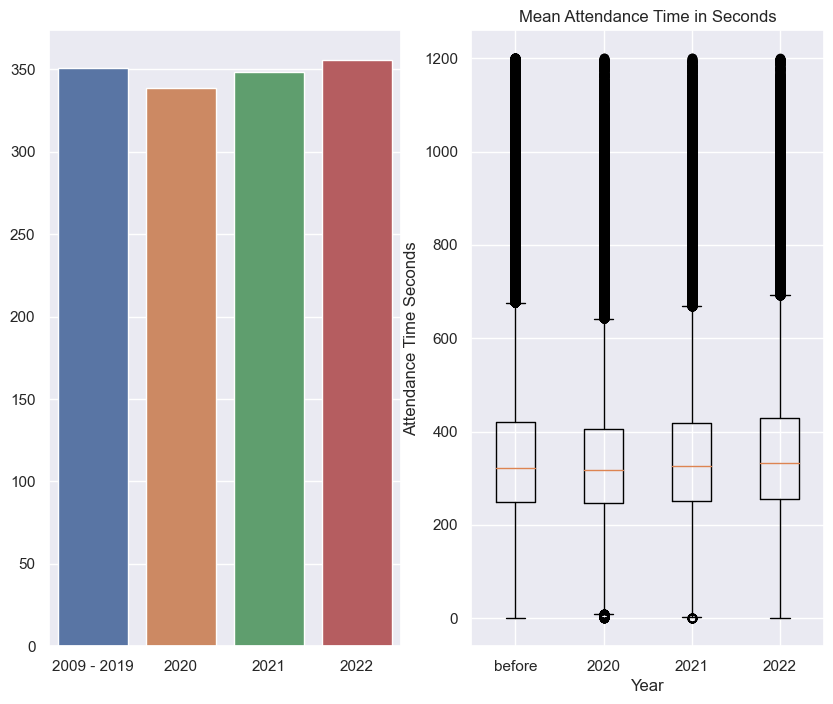

In [20]:
_2020 = merged_df[merged_df['CalYear'] == 2020] # creating a dataframe with only the year 2020
_2021 = merged_df[merged_df['CalYear'] == 2021] # creating a dataframe with only the year 2021
_2022 = merged_df[merged_df['CalYear'] == 2022] # creating a dataframe with only the year 2022
_before = merged_df[merged_df['CalYear'] < 2019] # creating a dataframe with the years before 2020

fig, axs = plt.subplots(1,2, figsize=(10,8))

# creating a barplot showing the mean Attendance time per year
sns.barplot(x=['2009 - 2019', '2020', '2021', '2022'],
            y=[_before.AttendanceTimeSeconds.mean(), _2020.AttendanceTimeSeconds.mean(), _2021.AttendanceTimeSeconds.mean(),
               _2022.AttendanceTimeSeconds.mean()],
            ax=axs[0])

plt.title('Mean Attendance Time in Seconds')
plt.xlabel('Year')
plt.ylabel('Attendance Time Seconds');

# creating a boxplot showing the mean Attendance time per year
axs[1].boxplot([_before['AttendanceTimeSeconds'], _2020['AttendanceTimeSeconds'], _2021['AttendanceTimeSeconds'],
                _2022['AttendanceTimeSeconds']], labels=['before', '2020', '2021','2022']);

# performing a ttest between the Attendance Time in 2020 and the years before
t_statistic, p_value = stats.ttest_ind(_2020['AttendanceTimeSeconds'], _before['AttendanceTimeSeconds'], equal_var=False)

# print the result
if p_value < 0.05:  # setting alpha as 5% 
    print("There is a significant deviation from the mean Attendance time in 2020 to the values before this year. The p-value is",p_value)
else:
    print("There is a significant deviation from the mean Attendance time in 2020 to the values before this year. The p-value is",p_value)
    

In [21]:
# checking if all missing values in special service type correlate to no special service in stop code description
merged_df[~(merged_df['StopCodeDescription'] == 'Special Service') & (merged_df['SpecialServiceType'].isna() != True)].loc[:,['StopCodeDescription', 'SpecialServiceType']]

,StopCodeDescription,SpecialServiceType


In [ ]:
# checking the number of different stations in every year
for year in merged_df["CalYear"].unique():
    print(f"In year {year} there were {merged_df[merged_df['CalYear'] == year]['DeployedFromStation_Name'].nunique()} different stations.")